In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content

/content


In [ ]:
file_path = "/content/drive/MyDrive/cs/cs133/project/apple_stock.csv"

df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


# Imports ⬇

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])
print(df.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
df_2024 = df[df['Date'].dt.year == 2024].reset_index(drop=True)

In [ ]:
print("Date range:", df_2024['Date'].min(), "~", df_2024['Date'].max())

Date range: 2024-01-02 00:00:00 ~ 2024-12-31 00:00:00


In [ ]:
df_2024.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2024-01-02,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
1,2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2,2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
3,2024-01-05,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
4,2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [ ]:
df_2024.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
247,2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700
248,2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
249,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
250,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
251,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700


In [ ]:
close_minus_open_list = []

In [ ]:
for _, row in df_2024.iterrows():
    diff = row['Close'] - row['Open']
    close_minus_open_list.append(diff)

In [ ]:
df_2024['close_minus_open'] = close_minus_open_list

In [ ]:
df_2024[['Date', 'Open', 'Close', 'close_minus_open']].head()

,Date,Open,Close,close_minus_open
0,2024-01-02,187.149994,185.639999,-1.509995
1,2024-01-03,184.220001,184.250000,0.029999
2,2024-01-04,182.149994,181.910004,-0.239990
3,2024-01-05,181.990005,181.179993,-0.810013
4,2024-01-08,182.089996,185.559998,3.470001


In [ ]:
up_down_current_list = []

In [ ]:
for _, row in df_2024.iterrows():
    if row['close_minus_open'] > 0:
        up_down_current_list.append(1)
    else:
        up_down_current_list.append(0)

In [ ]:
df_2024['up_down_current'] = up_down_current_list

In [ ]:
df_2024[['Date', 'close_minus_open', 'up_down_current']].head()

,Date,close_minus_open,up_down_current
0,2024-01-02,-1.509995,0
1,2024-01-03,0.029999,1
2,2024-01-04,-0.239990,0
3,2024-01-05,-0.810013,0
4,2024-01-08,3.470001,1


In [ ]:
overnight_gap_list = []

In [ ]:
prev_close = None

In [ ]:
for _, row in df_2024.iterrows():
    if prev_close is None:
        overnight_gap_list.append(None)
    else:
        diff = prev_close - row['Open']
        overnight_gap_list.append(diff)

    prev_close = row['Close']

In [ ]:
df_2024['overnight_gap'] = overnight_gap_list

In [ ]:
df_2024[['Date', 'Close', 'Open', 'overnight_gap']].head()

,Date,Close,Open,overnight_gap
0,2024-01-02,185.639999,187.149994,NaN
1,2024-01-03,184.250000,184.220001,1.419998
2,2024-01-04,181.910004,182.149994,2.100006
3,2024-01-05,181.179993,181.990005,-0.080002
4,2024-01-08,185.559998,182.089996,-0.910004


In [ ]:
up_down_overnight_list = []

In [ ]:
for _, row in df_2024.iterrows():
    gap = row['overnight_gap']

    if pd.isna(gap):
        up_down_overnight_list.append(None)
    elif gap > 0:
        up_down_overnight_list.append(1)
    else:
        up_down_overnight_list.append(0)

In [ ]:
df_2024['up_down_overnight'] = up_down_overnight_list

In [ ]:
df_2024['up_down_overnight'] = df_2024['up_down_overnight'].astype('Int64')

In [ ]:
df_2024[['Date', 'overnight_gap', 'up_down_overnight']].head()

,Date,overnight_gap,up_down_overnight
0,2024-01-02,NaN,<NA>
1,2024-01-03,1.419998,1
2,2024-01-04,2.100006,1
3,2024-01-05,-0.080002,0
4,2024-01-08,-0.910004,0


In [ ]:
df_2024['weekday_name'] = df_2024['Date'].dt.day_name()
df_2024['weekday'] = df_2024['Date'].dt.weekday
df_2024['month'] = df_2024['Date'].dt.month
df_2024['day'] = df_2024['Date'].dt.day

In [ ]:
df_2024[['Date', 'weekday_name', 'weekday', 'month', 'day']].head()

,Date,weekday_name,weekday,month,day
0,2024-01-02,Tuesday,1,1,2
1,2024-01-03,Wednesday,2,1,3
2,2024-01-04,Thursday,3,1,4
3,2024-01-05,Friday,4,1,5
4,2024-01-08,Monday,0,1,8


In [ ]:
weekday_onehot = pd.get_dummies(
    df_2024['weekday_name'],
    prefix='wd',
    dtype='Int64'
)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_onehot = weekday_onehot[[f'wd_{d}' for d in weekday_order]]

for col in weekday_onehot.columns:
    df_2024[col] = weekday_onehot[col]

In [ ]:
df_2024[['Date', 'weekday_name'] + list(weekday_onehot.columns)].head()

,Date,weekday_name,wd_Monday,wd_Tuesday,wd_Wednesday,wd_Thursday,wd_Friday
0,2024-01-02,Tuesday,0,1,0,0,0
1,2024-01-03,Wednesday,0,0,1,0,0
2,2024-01-04,Thursday,0,0,0,1,0
3,2024-01-05,Friday,0,0,0,0,1
4,2024-01-08,Monday,1,0,0,0,0


In [ ]:
weekday_stats_current = (
    df_2024
    .groupby('weekday_name')['up_down_current']
    .agg(total_days='count', up_days='sum')
)

weekday_stats_current['down_days'] = (
    weekday_stats_current['total_days'] - weekday_stats_current['up_days']
)

weekday_stats_current = weekday_stats_current.reindex(weekday_order)

weekday_stats_current

,total_days,up_days,down_days
weekday_name,,,
Monday,48,29,19
Tuesday,53,31,22
Wednesday,50,29,21
Thursday,50,24,26
Friday,51,24,27


In [ ]:
weekday_stats_overnight = (
    df_2024
    .dropna(subset=['up_down_overnight'])
    .groupby('weekday_name')['up_down_overnight']
    .agg(total_days='count', up_days='sum')
)

weekday_stats_overnight['down_days'] = (
    weekday_stats_overnight['total_days'] - weekday_stats_overnight['up_days']
)

weekday_stats_overnight = weekday_stats_overnight.reindex(weekday_order)

weekday_stats_overnight

,total_days,up_days,down_days
weekday_name,,,
Monday,48,25,23
Tuesday,52,26,26
Wednesday,50,31,19
Thursday,50,20,30
Friday,51,21,30


### Adding Weekly graph as well (date randomly selected : 2024-03-04 ~ 2024-03-08)


In [ ]:
week_df = df_2024[(df_2024['Date'] >= '2024-03-04') & (df_2024['Date'] <= '2024-03-08')].copy()

In [ ]:
week_df['intraday_up'] = (week_df['up_down_current'] == 1).astype(int)
week_df['intraday_down'] = (week_df['up_down_current'] == 0).astype(int)

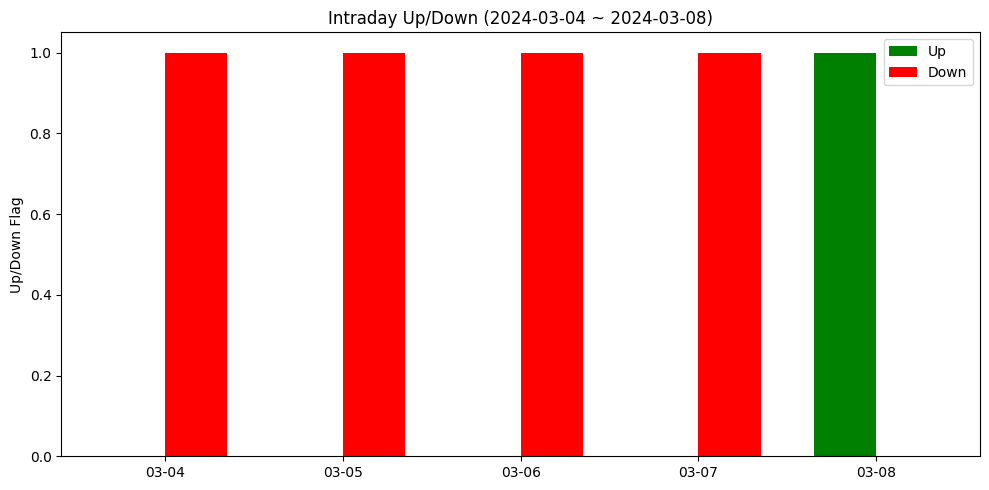

In [ ]:
x = np.arange(len(week_df))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, week_df['intraday_up'], width=width, color='green', label='Up')
plt.bar(x + width/2, week_df['intraday_down'], width=width, color='red', label='Down')
plt.xticks(x, week_df['Date'].dt.strftime('%m-%d'))
plt.title("Intraday Up/Down (2024-03-04 ~ 2024-03-08)")
plt.ylabel("Up/Down Flag")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
week_df['overnight_up'] = (week_df['up_down_overnight'] == 1).astype(int)
week_df['overnight_down'] = (week_df['up_down_overnight'] == 0).astype(int)

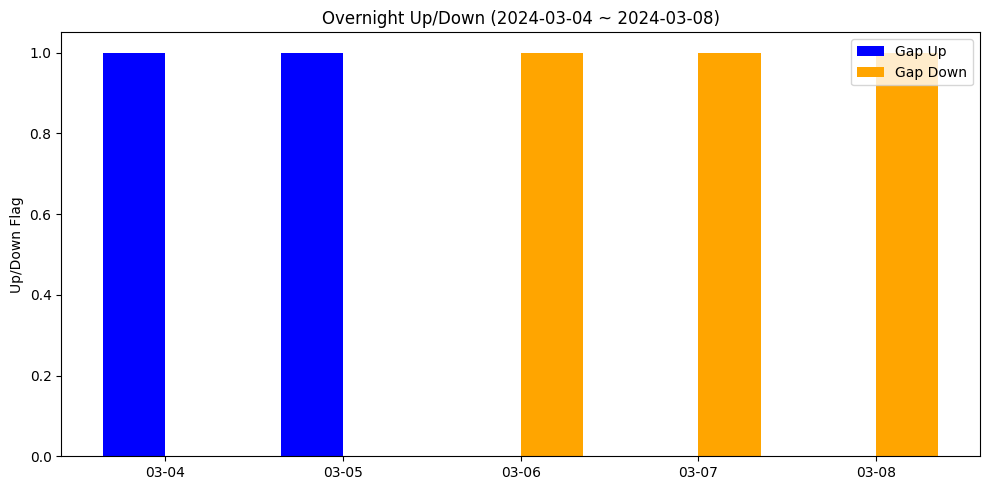

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x - width/2, week_df['overnight_up'], width=width, color='blue', label='Gap Up')
plt.bar(x + width/2, week_df['overnight_down'], width=width, color='orange', label='Gap Down')
plt.xticks(x, week_df['Date'].dt.strftime('%m-%d'))
plt.title("Overnight Up/Down (2024-03-04 ~ 2024-03-08)")
plt.ylabel("Up/Down Flag")
plt.legend()
plt.tight_layout()
plt.show()

## Switching to Monthly

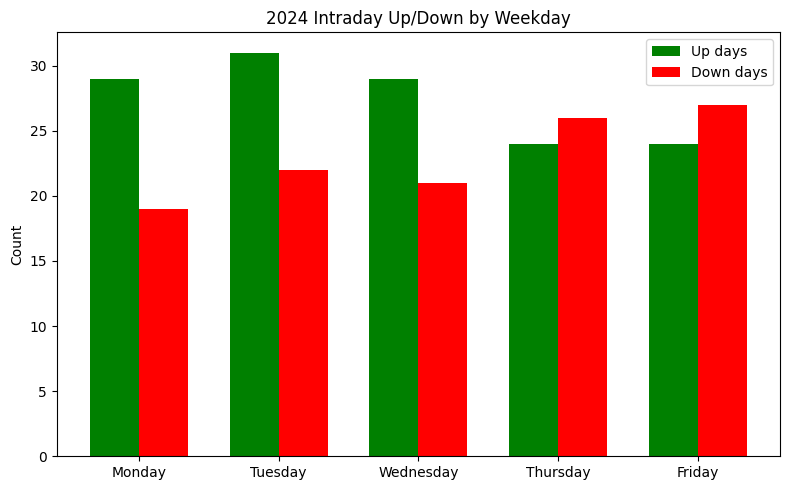

In [ ]:
x = np.arange(len(weekday_stats_current.index))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2,
        weekday_stats_current['up_days'],
        width=width,
        label='Up days',
        color='green')

plt.bar(x + width/2,
        weekday_stats_current['down_days'],
        width=width,
        label='Down days',
        color='red')

plt.xticks(x, weekday_stats_current.index)

plt.title("2024 Intraday Up/Down by Weekday")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

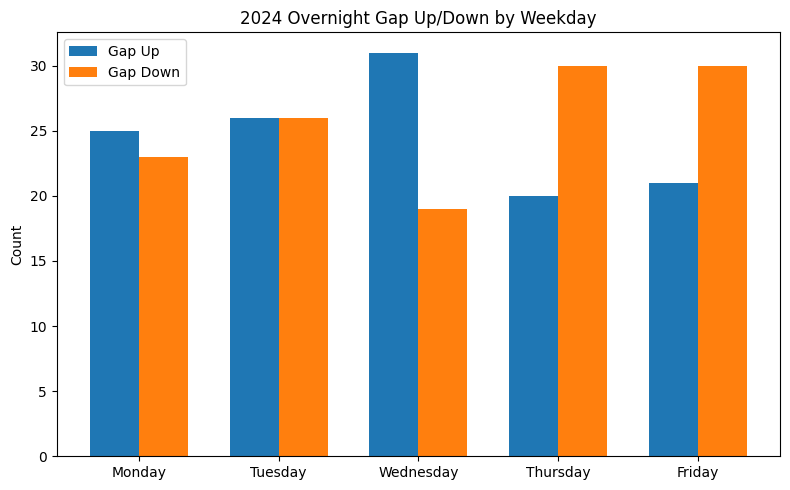

In [ ]:
x = np.arange(len(weekday_stats_overnight.index))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(
    x - width/2,
    weekday_stats_overnight['up_days'],
    width=width,
    label='Gap Up',
)

plt.bar(
    x + width/2,
    weekday_stats_overnight['down_days'],
    width=width,
    label='Gap Down',
)

plt.xticks(x, weekday_stats_overnight.index)

plt.title("2024 Overnight Gap Up/Down by Weekday")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

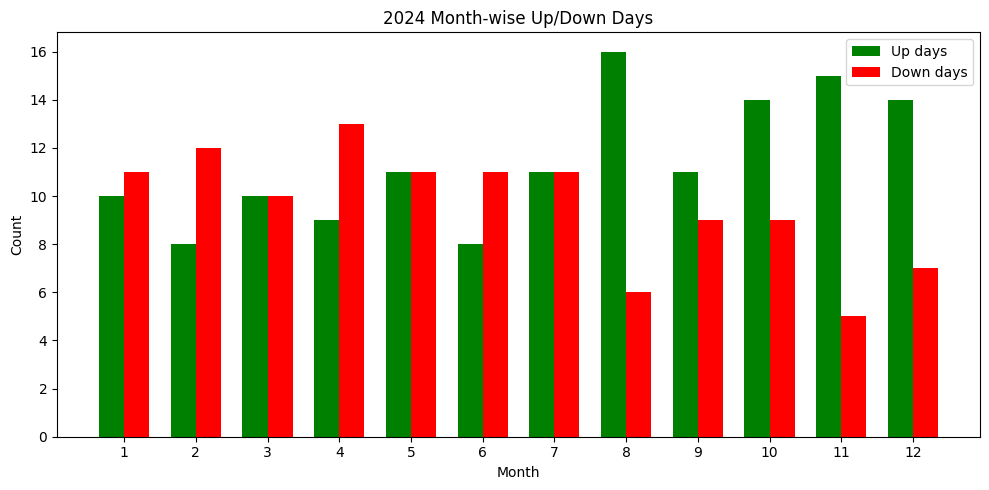

In [ ]:
df_month_stats = (
    df_2024.groupby('month')['up_down_current']
    .agg(total='count', up='sum')
)
df_month_stats['down'] = df_month_stats['total'] - df_month_stats['up']

x = np.arange(len(df_month_stats.index))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, df_month_stats['up'], width=width, label='Up days', color='green')
plt.bar(x + width/2, df_month_stats['down'], width=width, label='Down days', color='red')

plt.xticks(x, df_month_stats.index)
plt.title("2024 Month-wise Up/Down Days")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()